# Data Science Fundamentals Project

The dataset that we've selected for this project is a dataset regarding superconductivity available on both the UCI machine learning repository as well as Kaggle. <br> Link to UCI : https://archive.ics.uci.edu/dataset/464/superconductivty+data 
<br> Link to Kaggle : https://www.kaggle.com/c/superconductivity/overview
<br>

We selected this dataset because it lies at the intersection of the fields of physics, chemistry and machine learning, aligning well with the required domain. The dataset contains information of more than 21,000 superconductors and 80 different physical and chemical properties of the constituent elements, such as atomic mass, thermal conductivity, first ionization energy, atomic radius.

---

## Problem Statement

The problem we aimed to solve in this project is the resource-intensive nature of the discovery of superconducting materials based on their elemental and physicochemical properties. Superconductors play vital roles in technologies such as MRI machines, quantum computing, maglev trains, and energy-efficient power transmission. However, discovering new superconductors experimentally is extremely resource-intensive and humans have not yet identified a consistent method for their discovery. A study by Hosono et al. (2015) **[Hosono, H., Tanabe, K., Takayama-Muromachi, E., Kageyama, H., Yamanaka, S., Kumakura, H., … Fujitsu, S. (2015). Exploration of new superconductors and functional materials, and fabrication of superconducting tapes and wires of iron pnictides. Science and Technology of Advanced Materials, 16(3). https://doi.org/10.1088/1468-6996/16/3/033503]** states that after testing approximately 1000 materials for superconductivity, only about 3% of them, i.e, ~30 materials showed superconductivity. <br>

---

## Scenario

**Cryocooler-Friendly Electronics** <br>
A quantum-computing start-up is developing next-generation devices cooled by cryocoolers with a maximum operating temperature of 77 K. To ensure efficiency and cost-effectiveness, they seek superconducting materials with a critical temperature (Tc) ≥ 77 K. The materials require not only a high critical temperature, but must also exhibit mechanical toughness to withstand device fabrication and operational stresses. As a proxy for mechanical stability, other physicochemical features will be used to approximate mechanical toughness of the compound.

Given the high cost and low success rate of traditional experimental discovery methods, the company aims to accelerate the identification of suitable materials through data-driven techniques. This project explores how high critical temperatue superconductors are distributed among different classes of compounds. We also explore how specific elemental properties; such as electronegativity, valence electron concentration, and atomic mass, influence superconducting behavior. By leveraging machine learning models trained on elemental descriptors, the goal is to enable a more efficient and targeted approach to superconductor discovery, ultimately bridging materials science and AI to guide real-world quantum hardware development.

---

##	Research Questions
The questions that we aim to answer with this project are: <br>

**Q1.** What percentage of known materials in the dataset already exceed 77 K, and how are they distributed across elemental families (oxide, cuprate, iron-based, etc.)?

**Q2.** What materials in the dataset are relatively tough while having a critical temperature of >77K?

**Q3.** What kind of machine learning model performs best in predicting the critical temperature of superconducting materials based on physicochemical descriptors?

**Q4.** IDK YET

---

### About the data

There are two files : <b>"train.csv"</b> and <b>"unique_m.csv".</b>
- <b> train.csv </b> contains the number of elements, mean, geometric mean, standard deviation, weighted standard deviation, entropy, weighted entropy, range of various properties such as the fusion heat, number of valence electrons, thermal conductivity etc of the elements present in each superconductor. It also contains the critical temperature.
- <b> unique_m </b> contains chemical formula and the columns for 86 elements indicating the quantity present (as relative number of atoms) in the superconductor.

 For each material, a broad range of physicochemical properties are collected and then summarized using statistical descriptors across the constituent elements.

---

### Types of Physicochemical Properties Used

Each element in a compound contributes to the overall behavior of the material. The dataset captures the following core physicochemical properties:

1. **Atomic Mass** : Atomic mass is the weight of an atom, determined by its protons and neutrons. It affects how atoms vibrate and can influence how easily a material becomes superconducting.
2. **First Ionization Energy** : First Ionization Energy is the energy needed to remove the outermost electron from an atom.
3. **Atomic Radius** : Atomic radius measures the size of an atom. It influences how closely atoms pack together, which can impact electron interactions.
4. **Density** : Density is how much mass is in a given volume. It affects atomic packing and how efficiently heat and electrons move in a material.
5. **Electron Affinity** : Electron affinity is the energy change when an atom gains an electron. It reflects how readily atoms accept electrons, influencing charge movement in superconductors.
6. **Fusion Heat** : Fusion heat is the energy needed to melt a substance. It gives insight into bonding strength, which can relate to a material’s thermal and electronic behavior.
7. **Thermal Conductivity** : Thermal Conductivity measures how well a material conducts heat.
8. **Valence Electron Count** : This is the number of electrons in the outer shell of an atom. It determines how atoms bond and interact.

---

### Metrics Used to Aggregate Properties Across Elements

For each of the above properties, the dataset calculates **various statistical summaries** across the elements in a given material. These include:

| Metric Name    | Meaning                                                                |
| -------------- | ---------------------------------------------------------------------- |
| `mean_`        | Arithmetic mean of the property values across elements in the material |
| `wtd_mean_`    | Weighted mean (by element proportion in the compound)                  |
| `gmean_`       | Geometric mean (useful for multiplicative relationships)               |
| `wtd_gmean_`   | Weighted geometric mean                                                |
| `std_`         | Standard deviation across elements                                     |
| `wtd_std_`     | Weighted standard deviation                                            |
| `range_`       | Difference between max and min values across elements                  |
| `wtd_range_`   | Weighted version of range                                              |
| `entropy_`     | Shannon entropy of the distribution of that property among elements    |
| `wtd_entropy_` | Weighted entropy                                                       |

These metrics are computed **per property**. For example, the dataset includes `mean_atomic_mass`, `wtd_std_atomic_mass`, `entropy_atomic_mass`, and so on. This pattern repeats for all 8 properties.

---

### Other Features in the Dataset

* `number_of_elements`: Number of different elements in the material.
* `critical_temp`: The critical temperature at which the material becomes superconducting. This is the **target variable** in regression tasks.
* `chemical_formula`: The raw chemical formula (e.g., BaFe2As2).

---

### Importing Libraries

In [763]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

### Reading data from files

In [53]:
df = pd.read_csv("train.csv")
elements = pd.read_csv("unique_m.csv")

In [54]:
df["chemical_formula"] = elements["material"]

In [55]:
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,chemical_formula
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0,Ba0.3La1.7Cu1O4


In [56]:
elements.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [57]:
print("Shape of the dataset:", df.shape)
print("Column Types and Non-Null Counts:")
print(df.info())

Shape of the dataset: (21263, 83)
Column Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 83 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie    

In [58]:
print("Shape of the dataset:", df.shape)
print("Column Types and Non-Null Counts:")
print(elements.info())

Shape of the dataset: (21263, 83)
Column Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H              21263 non-null  float64
 1   He             21263 non-null  int64  
 2   Li             21263 non-null  float64
 3   Be             21263 non-null  float64
 4   B              21263 non-null  float64
 5   C              21263 non-null  float64
 6   N              21263 non-null  float64
 7   O              21263 non-null  float64
 8   F              21263 non-null  float64
 9   Ne             21263 non-null  int64  
 10  Na             21263 non-null  float64
 11  Mg             21263 non-null  float64
 12  Al             21263 non-null  float64
 13  Si             21263 non-null  float64
 14  P              21263 non-null  float64
 15  S              21263 non-null  float64
 16  Cl             21263 non-n

In [59]:
print("Missing Values in Each Column:")
print(df.isnull().sum().sort_values(ascending=False))

Missing Values in Each Column:
number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
chemical_formula         0
Length: 83, dtype: int64


We observe that there are **no null values** in the dataset.

In [60]:
print("Statistical summary:")
print(df.describe())

Statistical summary:
       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000 

In [61]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


There is seemingly no duplicate rows in the dataset. However, upon further inspection of the dataset, we observed some rows containing identical attributes in every field except for critical temperature. Some of these records seem to be of the same chemical compound under varying physical conditions such as pressure, electromagnetic field, current density etc, as they show varying critical temperatures.

In [63]:
print("Number of duplicate rows after dropping critical temperature:",df.drop(columns = "critical_temp").duplicated().sum())

Number of duplicate rows after dropping critical temperature: 5721


While these rows contain useful information for EDA, this type of data where the external factors affecting the data are not present in the dataset can cause confusion in machine learning models since features with completely identical values point to different target values. So for the EDA, we will proceed with the original data, but for the machine learning models we shall remove these duplicates and instead use the average value as the critical temperature for each compound.

While such variations are valuable for exploratory data analysis, they pose challenges for machine learning models. In supervised learning, we assume that identical inputs should correspond to the same output. Including these contradictory entries( the identical features with different target values) can confuse the model, degrade performance, and introduce label noise.

To address this, we will be adopting a dual approach:
- For EDA, we retain the full dataset to capture the real-world distribution and variability of critical temperatures across known materials.
- For machine learning, we remove rows with duplicate feature values and instead aggregate them by averaging the critical temperature. This produces a cleaner, more consistent dataset that adheres to supervised learning assumptions.

In [65]:
# creating dataframe without duplicate rows for machine learning
df_filtered = df.groupby("chemical_formula").agg("mean").reset_index()

In [66]:
df_filtered.head()

,chemical_formula,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,Ag0.002Al0.998,2.0,67.424869,27.143312,53.948587,27.056422,0.500522,0.046344,80.886661,26.711839,...,2.996,1.732051,2.993416,0.562335,0.005548,2.0,2.992,1.000000,0.089353,1.128
1,Ag0.005Zn0.995,2.0,86.624100,65.592441,83.978705,65.543882,0.662766,0.047664,42.488200,64.513759,...,1.995,1.414214,1.993081,0.636514,0.017513,1.0,1.985,0.500000,0.070534,0.763
2,Ag0.035Cd0.01Sn0.955,3.0,112.996400,118.267547,112.909335,118.248253,1.097840,0.194766,10.841800,112.243940,...,3.875,2.000000,3.784231,0.955700,0.083789,3.0,3.800,1.247219,0.582559,3.650
3,Ag0.03Tl0.97,2.0,156.125750,201.487847,148.480499,200.502064,0.644586,0.082284,96.515100,195.015755,...,2.940,1.732051,2.902737,0.562335,0.056937,2.0,2.880,1.000000,0.341174,2.670
4,Ag0.05Rh0.04Ti0.91,3.0,86.213567,53.068600,80.994602,51.401426,1.043637,0.592758,60.001200,39.442750,...,3.930,2.884499,3.793155,0.916465,0.297259,5.0,3.590,2.054805,0.777882,1.950


In [67]:
print("Number of duplicate rows after filtering (and dropping critical temperature):",df_filtered.drop(columns = "critical_temp").duplicated().sum())

Number of duplicate rows after filtering (and dropping critical temperature): 0


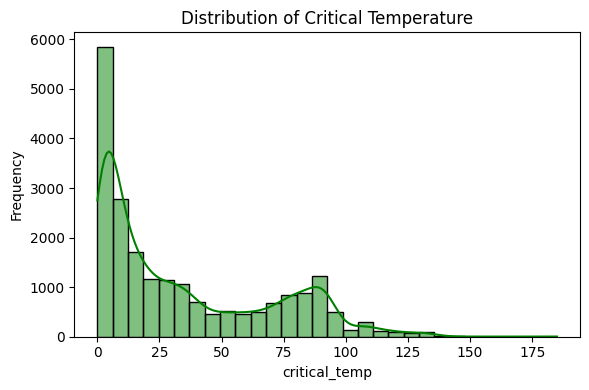

In [68]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='critical_temp', bins=30, kde=True, color='green')
plt.title('Distribution of Critical Temperature')
plt.xlabel('critical_temp')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The distribution of **critical temperature** is heavily right-skewed, indicating that the majority of superconducting materials have relatively low critical temperatures. Most values are clustered between 0 and 50, with a long tail extending toward higher temperatures beyond 100. This suggests that high-temperature superconductors are much less common in the dataset. This skewness may affect the performance of models sensitive to normality, such as linear regression.

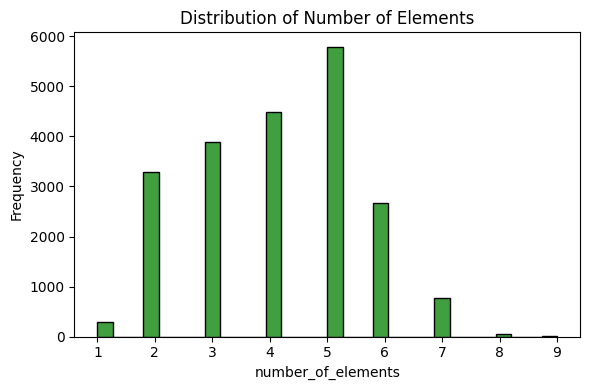

In [70]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='number_of_elements', bins=30, color='green')
plt.title('Distribution of Number of Elements')
plt.xlabel('number_of_elements')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The **number of elements** feature exhibits a bell-like shape centered around 5, indicating that most compounds consist of 4 to 6 chemical elements. This distribution suggests a preference for moderately complex materials in the dataset.

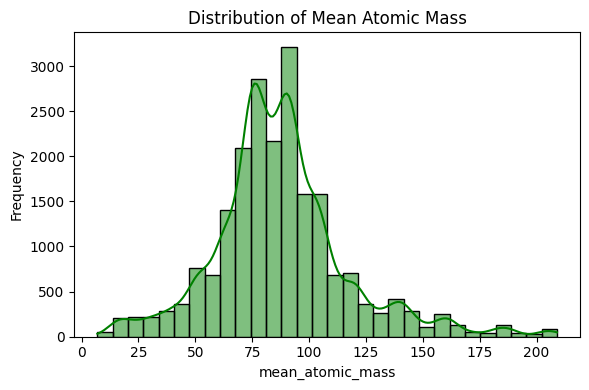

In [72]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='mean_atomic_mass', bins=30, kde=True, color='green')
plt.title('Distribution of Mean Atomic Mass')
plt.xlabel('mean_atomic_mass')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The histogram of **mean atomic mass** shows a near-normal distribution with slight right skewness. Most values are centered between 70 and 110 atomic mass units, indicating that the dataset is composed primarily of medium-weight elements.

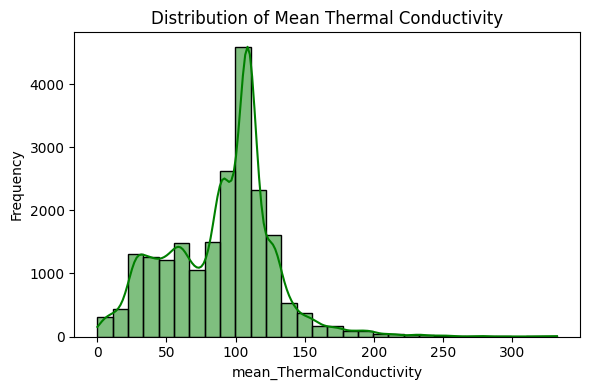

In [74]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='mean_ThermalConductivity', bins=30, kde=True, color='green')
plt.title('Distribution of Mean Thermal Conductivity')
plt.xlabel('mean_ThermalConductivity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The **mean thermal conductivity** feature is distinctly right-skewed, with most materials having values clustered around 100. There is a noticeable spike in frequency at this point, followed by a steep decline, forming a long tail toward values above 300. This skewness indicates that while most compounds conduct heat moderately well, a few outliers exhibit extremely high conductivity.

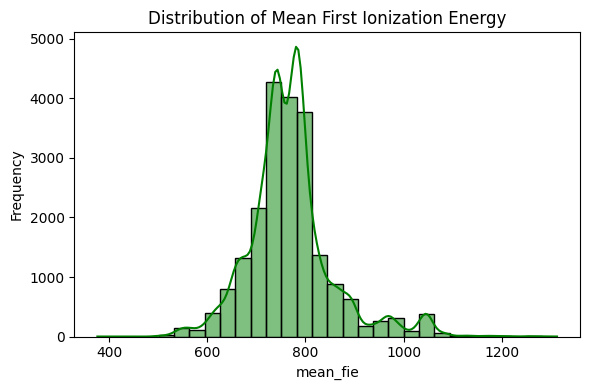

In [76]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='mean_fie', bins=30, kde=True, color='green')
plt.title('Distribution of Mean First Ionization Energy')
plt.xlabel('mean_fie')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The histogram of **mean_fie** (mean first ionization energy) shows an approximately normal distribution, centered around 750–800. This suggests that the ionization energy values of elements across the dataset are symmetrically distributed, with most materials having moderate energy levels required to remove the first electron. The relatively tight spread around the center implies consistent electron-binding energy properties among the compounds.

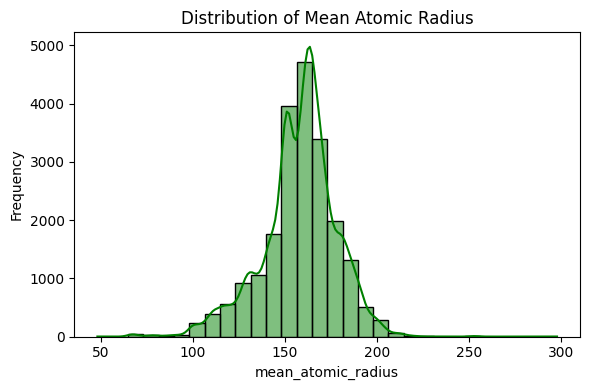

In [78]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='mean_atomic_radius', bins=30, kde=True, color='green')
plt.title('Distribution of Mean Atomic Radius')
plt.xlabel('mean_atomic_radius')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The histogram for **mean_atomic_radius** displays an almost perfect bell curve centered around 160, suggesting that most materials have similar atomic sizes. The narrow, symmetric peak indicates limited variability, which may reduce noise and simplify interpretation.

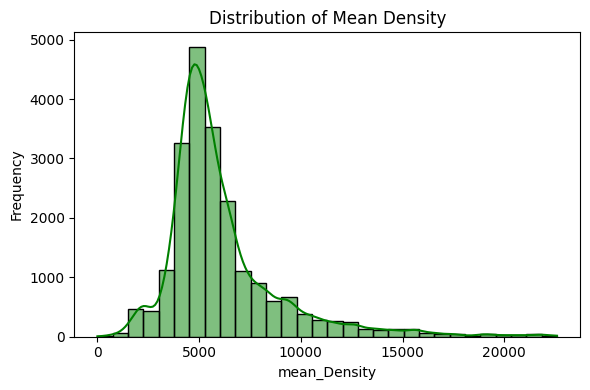

In [80]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='mean_Density', bins=30, kde=True, color='green')
plt.title('Distribution of Mean Density')
plt.xlabel('mean_Density')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The **mean_Density** variable is heavily right-skewed, with a steep drop after the peak around 5,000. A few compounds have extremely high densities, reaching values well above 20,000. This distribution implies the presence of significant outliers.

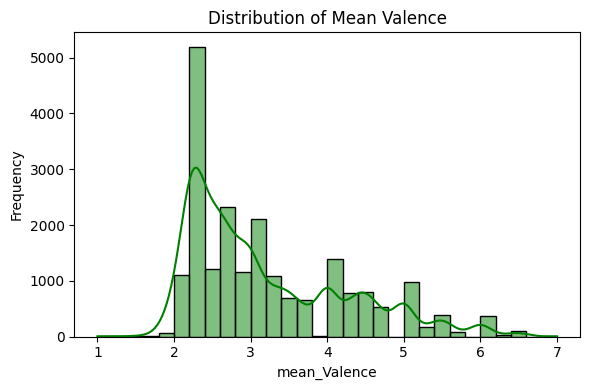

In [82]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='mean_Valence', bins=30, kde=True, color='green')
plt.title('Distribution of Mean Valence')
plt.xlabel('mean_Valence')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The histogram for **mean_Valence** is right-skewed and exhibits a discrete distribution, peaking sharply at a value of 2. Most materials fall between valence values of 2 and 4, with very few compounds having mean valences above 5. This suggests that low-valence materials dominate the dataset.

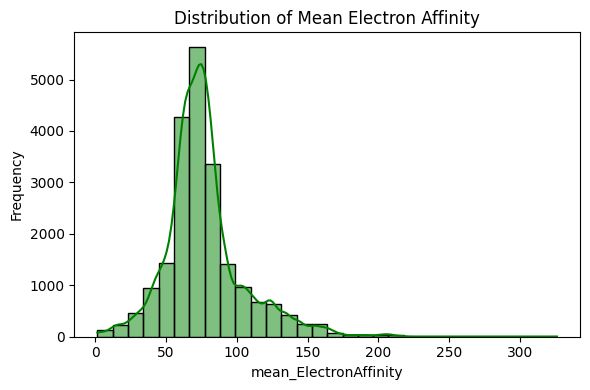

In [84]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='mean_ElectronAffinity', bins=30, kde=True, color='green')
plt.title('Distribution of Mean Electron Affinity')
plt.xlabel('mean_ElectronAffinity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The **mean_ElectronAffinity** feature displays a prominent peak around 75, with a right-skewed distribution. Most compounds fall between 50 and 100, with a few extending beyond 250. This pattern indicates that a majority of the materials exhibit moderate affinity for electrons, while highly reactive compounds are rare.

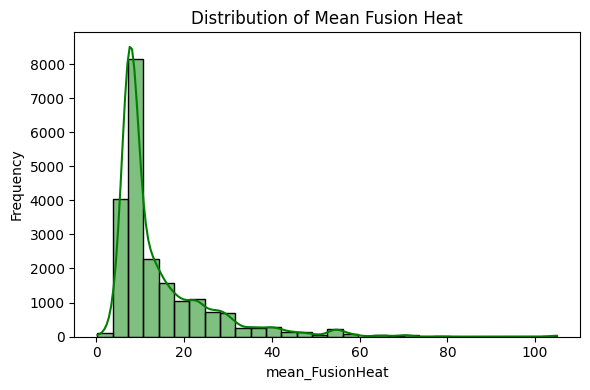

In [86]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='mean_FusionHeat', bins=30, kde=True, color='green')
plt.title('Distribution of Mean Fusion Heat')
plt.xlabel('mean_FusionHeat')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The distribution of **mean_FusionHeat** is heavily right-skewed, with the majority of values concentrated between 0 and 20. This indicates that most superconducting compounds in the dataset require relatively low amounts of energy to undergo phase transition from solid to liquid. A small number of compounds exhibit significantly higher fusion heat values, forming a long tail extending beyond 60. This skewness implies that while high-fusion-heat materials exist, they are rare.

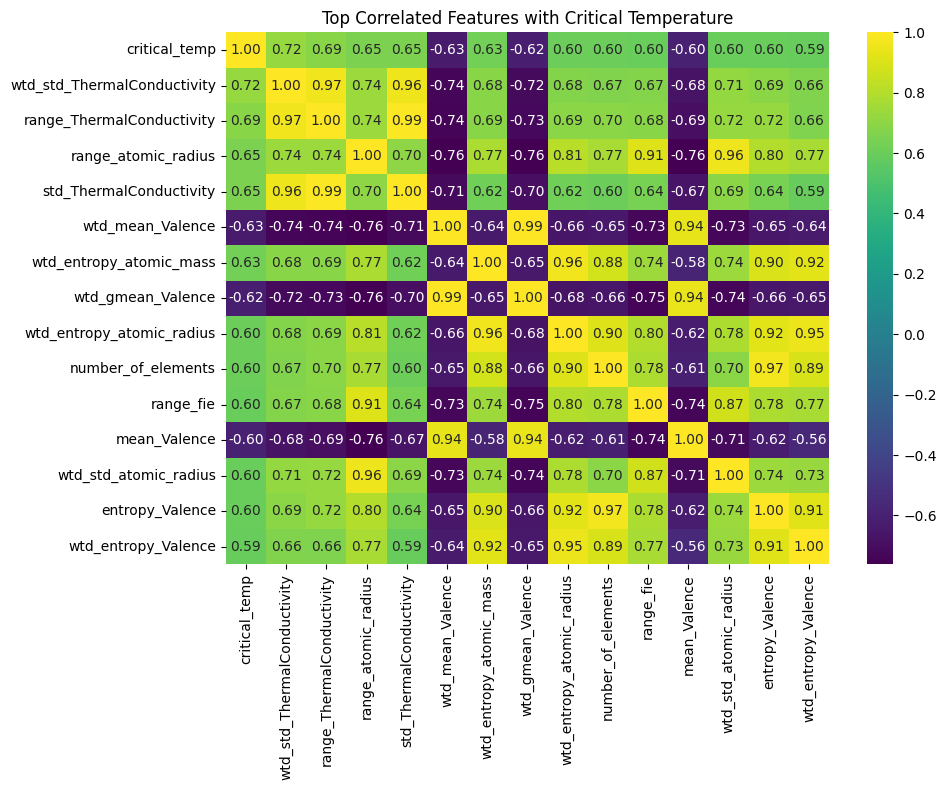

In [88]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
top_corr = corr_matrix['critical_temp'].abs().sort_values(ascending=False).head(15).index
sns.heatmap(df[top_corr].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Top Correlated Features with Critical Temperature')
plt.tight_layout()
plt.show()

Next, we compute the z-scores for the critical_temp column in the dataframe. Z-scores standardize the data by measuring how many standard deviations each value is away from the mean. The absolute value of the z-scores is calculated here using np.abs() to check for extreme values.

In [90]:
z_scores = np.abs(zscore(df['critical_temp']))
outliers = df[z_scores > 3]
print(f"Number of outliers in 'critical_temp' (z-score > 3 or z-score < -3): {len(outliers)}")


Number of outliers in 'critical_temp' (z-score > 3 or z-score < -3): 4


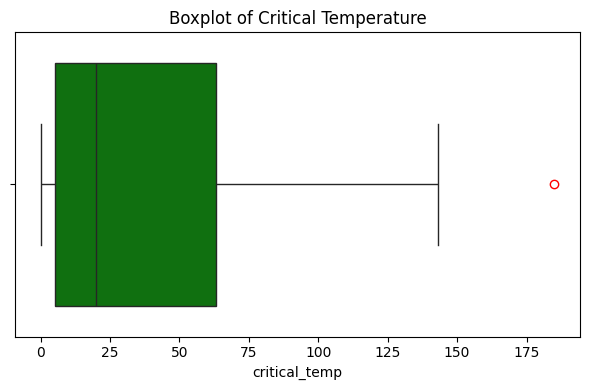

In [91]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['critical_temp'], color = "green", flierprops={"markeredgecolor": "red"})
plt.title('Boxplot of Critical Temperature')
plt.tight_layout()
plt.show()


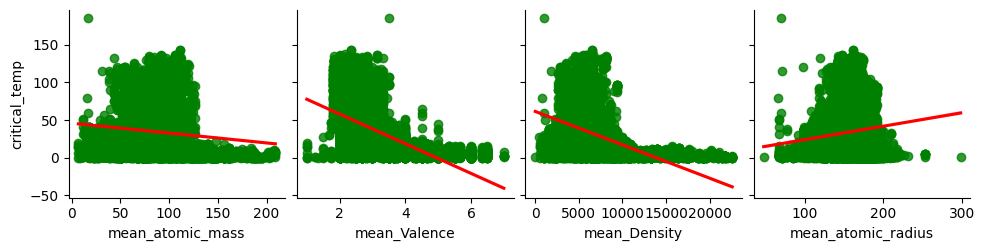

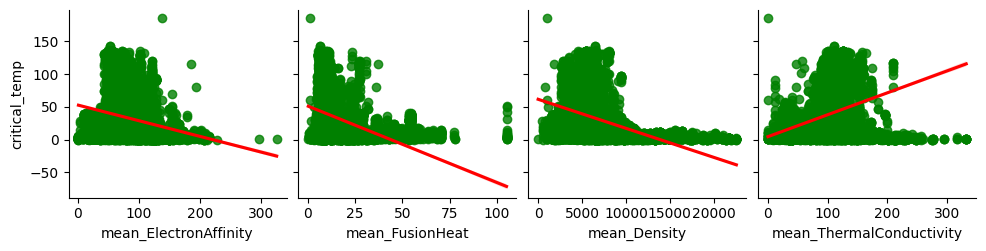

In [92]:
row1 = ['mean_atomic_mass', 'mean_Valence', 'mean_Density', 'mean_atomic_radius', ]
row2 = ['mean_ElectronAffinity', 'mean_FusionHeat', 'mean_Density', 'mean_ThermalConductivity']
sns.pairplot(data = df, y_vars = ['critical_temp'], x_vars = row1, kind = "reg", plot_kws = {"color" : "green" ,"line_kws" : {"color" : "red"}})
sns.pairplot(data = df, y_vars = ['critical_temp'], x_vars = row2, kind = "reg", plot_kws = {"color" : "green" ,"line_kws" : {"color" : "red"}})
plt.show()

The scatter plots above illustrate the linear relationships between various material properties and the target variable, critical temperature. Overall, several features show notable trends that suggest either positive or negative correlations.

Starting with mean atomic mass, there is a slight negative correlation with critical temperature, indicating that heavier elements tend to exhibit marginally lower critical temperatures. This trend becomes more pronounced with mean valence, which shows a clearer negative relationship—materials with higher average valence appear to have lower superconducting critical temperatures. A similar pattern is observed with mean density, where a strong negative slope suggests that denser materials tend to suppress critical temperature. Interestingly, mean atomic radius stands out as one of the few positively correlated features; as the atomic radius increases, so does the critical temperature, implying that more spatially extended atoms may support superconductivity more effectively.

Moving to the second row, mean electron affinity also displays a weak negative correlation with critical temperature. Meanwhile, mean fusion heat shows a more moderate negative trend, hinting that materials requiring more energy to melt may not favor higher critical temperatures. The mean density plot is repeated, reinforcing the earlier observation of a strong inverse relationship. Finally, mean thermal conductivity exhibits a noticeable positive correlation with critical temperature, suggesting that materials with better heat conduction are more likely to exhibit superconductivity at higher temperatures.

These visual trends highlight a combination of physical and electronic factors that influence superconducting behavior and help identify which features may be most predictive in modeling critical temperature.

## Q. What percentage of known materials in the dataset already exceed 77 K, and how are they distributed across elemental families (oxide, cuprate, iron-based, etc.)?

#### Part 1: What percentage of known materials in the dataset exceed 77?

In [935]:
high_critical_temp = df[df["critical_temp"] > 77]

In [937]:
print(f"The percentage of materials in the dataset exceeding 77K in critical temperature is: {round(high_critical_temp.shape[0] / df.shape[0] * 100, 4)}%")

The percentage of materials in the dataset exceeding 77K in critical temperature is: 18.3182%


Only **18.3182%** of the materials in the dataset have a critical temperature of above 77 Kelvin.

#### Part 2: How is this distributed across elemental families

The dataset does not include information regarding the class or elemental family of the compounds, so we created a rule-based classification function that assigns each compound to a class based on the presence and quantity of specific elements. The classification criteria for each family are summarized below:

| **Family**             | **Classification Criteria**                                    |
| ---------------------- | -------------------------------------------------------------- |
| **Cuprate**            | Cu ≥ 2 and O ≥ 2 and O/Cu ≥ 1.5                                |
| **Iron-based**         | Fe ≥ 1 and (As or Se or Te) ≥ 1                                |
| **Oxide**              | O ≥ 2 and Cu < 2 and Fe = 0                                    |
| **Rare-Earth Based**   | Contains any rare earth element (La, Ce, Nd, etc. including Y) |
| **Actinide-Based**     | Contains any actinide (U, Th, Pu, etc.)                        |
| **Boride**             | B ≥ 1                                                          |
| **Carbide/Nitride**    | C ≥ 1 or N ≥ 1                                                 |
| **Hydride**            | H ≥ 1                                                          |
| **Fluoride**           | F ≥ 1                                                          |
| **Halide**             | Contains any halogen (F, Cl, Br, I)                            |
| **Chalcogenide**       | Contains S, Se, or Te                                          |
| **Phosphide/Arsenide** | P ≥ 1 or As ≥ 1                                                |
| **Heavy Fermion**      | Contains Ce, Yb, or U (regardless of count)                    |
| **Simple Metal**       | Total atoms ≤ 2 and no transition metals present               |
| **Other**              | Does not meet any of the above conditions                      |

In [143]:
def classify_family(row):
    transition_metals = {
        'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn',
        'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd',
        'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg'
    }
    
    rare_earth = {'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd',
                   'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y'}
    actinides = {'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm',
                 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr'}

    if row.get('Cu', 0) >= 2 and row.get('O', 0) >= 2 and (row.get('O', 0) / row.get('Cu', 0)) >= 1.5:
        return 'Cuprate'
    elif row.get('Fe', 0) >= 1 and any(row.get(e, 0) >= 1 for e in ['As', 'Se', 'Te']):
        return 'Iron-based'
    elif row.get('O', 0) >= 2 and row.get('Cu', 0) < 2 and row.get('Fe', 0) == 0:
        return 'Oxide'
    elif any(row.get(e, 0) > 0 for e in rare_earth):
        return 'Rare-Earth Based'
    elif any(row.get(e, 0) > 0 for e in actinides):
        return 'Actinide-Based'
    elif row.get('B', 0) >= 1:
        return 'Boride'
    elif row.get('C', 0) >= 1 or row.get('N', 0) >= 1:
        return 'Carbide/Nitride'
    elif row.get('H', 0) >= 1:
        return 'Hydride'
    elif row.get('F', 0) >= 1:
        return 'Fluoride'
    elif any(row.get(e, 0) >= 1 for e in ['F', 'Cl', 'Br', 'I']):
        return 'Halide'
    elif any(row.get(e, 0) >= 1 for e in ['S', 'Se', 'Te']):
        return 'Chalcogenide'
    elif any(row.get(e, 0) >= 1 for e in ['P', 'As']):
        return 'Phosphide/Arsenide'
    elif any(row.get(e, 0) > 0 for e in ['Ce', 'U', 'Yb']):
        return 'Heavy Fermion'
    elif sum(row.get(e, 0) for e in row.index if isinstance(row.get(e, 0), (int, float))) <= 2 and not any(e in transition_metals and row.get(e, 0) > 0 for e in row.index):
        return 'Simple Metal'
    else:
        return 'Other'

In [145]:
df["Class"] = elements.apply(classify_family, axis=1)

In [176]:
class_grouped_df = df.drop(columns = "chemical_formula") \
    .groupby("Class") \
    .agg(average = ("critical_temp", "mean"), support = ("critical_temp", "count")) \
    .sort_values(by = "average", ascending = False)

In [178]:
class_grouped_df

,average,support
Class,,
Cuprate,67.671299,5995
Fluoride,43.254417,24
Hydride,31.470435,23
Oxide,29.384003,3052
Halide,28.490552,29
Iron-based,24.794794,1191
Rare-Earth Based,23.566949,3891
Boride,21.843491,530
Other,18.470720,4850


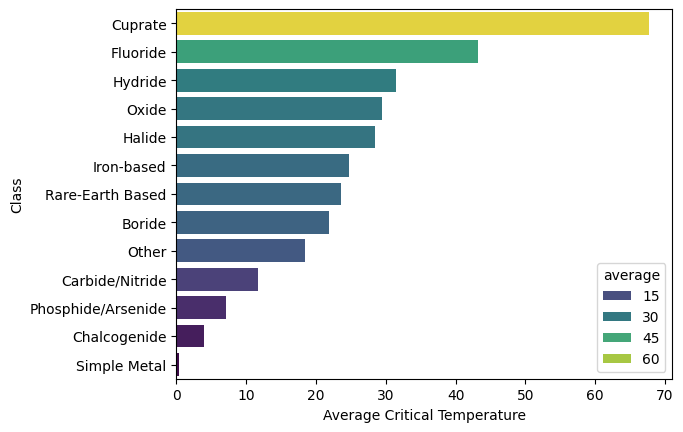

In [903]:
sns.barplot(y = "Class", x = "average", data = class_grouped_df, hue = "average", palette = "viridis")
plt.xlabel("Average Critical Temperature")
plt.show()

In [905]:
class_grouped_high_tc_df = df[df["critical_temp"] > 100].groupby("Class")\
    .agg(support = ("critical_temp", "count"), average = ("critical_temp", "mean")) \
    .sort_values(by = "average", ascending = False)

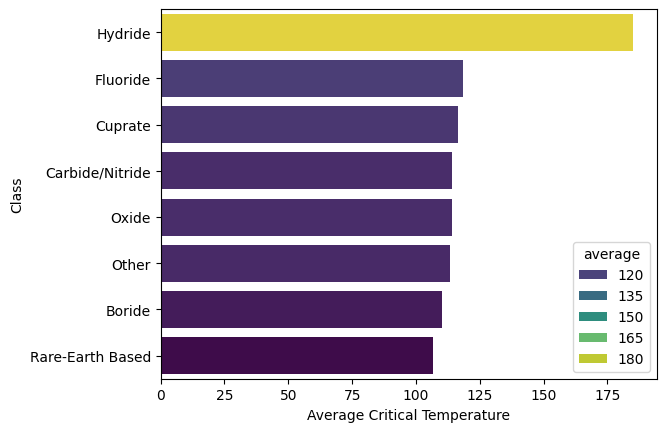

In [907]:
sns.barplot(y = "Class", x = "average", data = class_grouped_high_tc_df, hue = "average", palette = "viridis")
plt.xlabel("Average Critical Temperature")
plt.show()

In [919]:
joined_df = pd.merge(class_grouped_df, class_grouped_high_tc_df, on = "Class")
joined_df["percentage"] = joined_df["support_y"] / joined_df["support_x"] * 100
joined_df.sort_values("percentage", inplace = True, ascending = False)

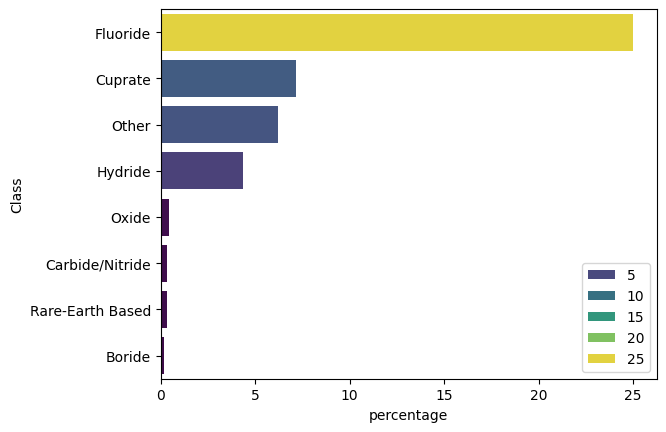

In [931]:
sns.barplot(y = "Class", x = "percentage", data = joined_df, hue = "percentage", palette = "viridis")
plt.legend(loc = "lower right")
plt.show()

## Q. What materials in the dataset are relatively tough while having a critical temperature of >77K?

Our dataset does not contain any direct information regarding mechanical toughness of the materials. To **approximate mechanical toughness in the absence of direct experimental data**, we use a set of features that potentially contribute to the toughness of the material. These features capture variations in atomic size, mass, bonding preference, and thermal stability which are all factors known to influence lattice cohesion and resistance to fracture. Since many of the materials in the dataset are inorganic compounds (such as oxides, intermetallics, and superconducting ceramics), this proxy based approach offers a useful, if approximate, indication of structural robustness.

The selected features and their justifications are summarized below:

| Feature                        | Description                                                  | Why It Matters for Toughness                                  |
|-------------------------------|--------------------------------------------------------------|----------------------------------------------------------------|
| `range_atomic_radius`         | Max - min of atomic radii                                   | High mismatch increases lattice strain and brittleness        |
| `std_atomic_radius`           | Standard deviation of atomic radii                          | Measures spatial disorder and local stress concentration      |
| `entropy_atomic_mass`         | Shannon entropy of atomic masses                            | Higher values imply more mass disorder, reducing stability     |
| `wtd_entropy_atomic_mass`     | Entropy weighted by atomic fractions                        | Highlights dominant disorder in multi-element compounds        |
| `range_atomic_mass`           | Mass difference between heaviest/lightest atoms             | Large disparity causes mechanical heterogeneity               |
| `mean_FusionHeat`             | Average enthalpy of fusion                                  | Higher values imply stronger interatomic bonding              |
| `std_FusionHeat`              | Variation in enthalpy of fusion                             | Bonding inconsistency can indicate weak interfaces             |
| `entropy_Valence`             | Entropy of elemental valence states                         | Variation may cause uneven bonding or phase instability        |
| `range_Valence`               | Difference between max and min valence                      | Diverse bonding preferences can reduce coherence               |

This approximation works best for ionic compounds, such as oxides, nitrides, and intermetallics, because their mechanical behavior is largely governed by the size and charge mismatch of constituent ions. In such materials, even minor distortions in lattice geometry; caused by atomic size variance or charge imbalance, can lead to increased brittleness or phase instability. The chosen descriptors capture these structural sensitivities effectively.

However, this method is less accurate for covalent crystals because the direction of bonding is the primary contributor to mechanical performance, and it's unsuitable for organic or polymeric compounds where toughness is influenced by molecular conformation, flexibility, and weak intermolecular forces rather than atomic-scale variance.

In [242]:
# Define relevant features for mechanical toughness approximation
toughness_features = [
    'range_atomic_radius', 'std_atomic_radius',
    'entropy_atomic_mass', 'wtd_entropy_atomic_mass',
    'range_atomic_mass', 'std_atomic_mass',
    'mean_FusionHeat', 'std_FusionHeat',
    'entropy_Valence', 'range_Valence'
]

# Example thresholds (you can adjust based on EDA/literature)
thresholds = {
    'range_atomic_radius': 220,
    'std_atomic_radius': 100,
    'entropy_atomic_mass': 1.5,
    'wtd_entropy_atomic_mass': 1.5,
    'range_atomic_mass': 200,
    'std_atomic_mass': 100,
    'mean_FusionHeat': 8,   # higher is better
    'std_FusionHeat': 6,
    'entropy_Valence': 1.5,
    'range_Valence': 2
}

# Apply filtering
filtered_df = df.copy()
for feature, cutoff in thresholds.items():
    if 'mean_FusionHeat' in feature:  # we want higher fusion heat
        filtered_df = filtered_df[filtered_df[feature] >= cutoff]
    else:  # we want lower variability
        filtered_df = filtered_df[filtered_df[feature] <= cutoff]

print(f"Filtered dataset size: {filtered_df.shape}")

Filtered dataset size: (2901, 84)


In [244]:
# normalize the toughness features
X = filtered_df[toughness_features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# applying PCA to create a single column for toughness index
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# adding PCA components to the dataframe
filtered_df = filtered_df.loc[X.index].copy()
filtered_df['toughness_score'] = X_pca[:, 0]

In [863]:
# sorting by toughness_score
ranked_materials = filtered_df.sort_values(by='toughness_score', ascending=False)

# Display top 10
top10_materials = ranked_materials[['chemical_formula', 'critical_temp', 'toughness_score']].head(20).groupby("chemical_formula").agg("mean").head(20).sort_values(by='toughness_score', ascending=False)

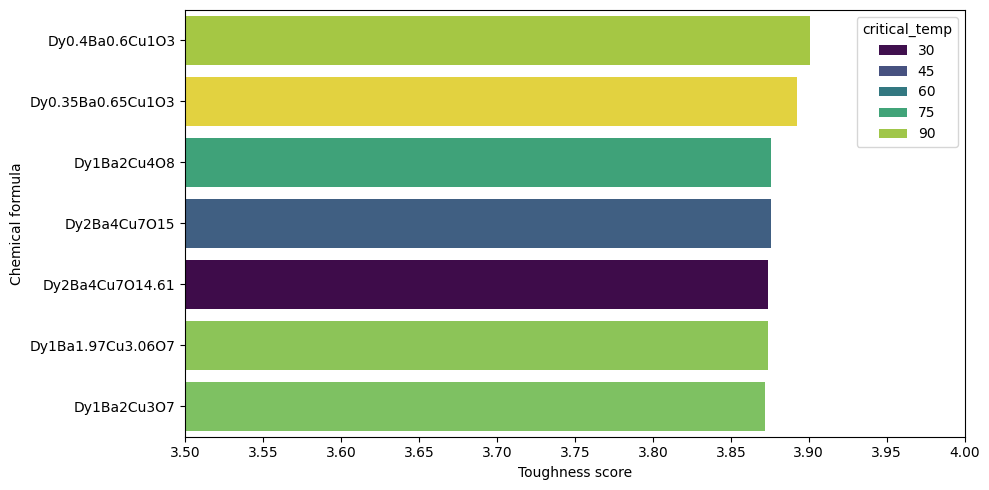

In [899]:
plt.figure(figsize = (10,5))
sns.barplot(x = "toughness_score", y = "chemical_formula", data = top10_materials, hue = "critical_temp", palette = "viridis")
plt.xlabel("Toughness score")
plt.ylabel("Chemical formula")
plt.xlim(3.5, 4.0)
xticks = np.arange(3.5, 4.05, 0.05)
plt.xticks(xticks)
plt.tight_layout()
plt.show()
plt.show()


## <b> Q. </b> What kind of machine learning model performs best in predicting the critical temperature of superconducting materials based on physicochemical descriptors?

In [700]:
top_corr.drop("critical_temp")

Index(['wtd_std_ThermalConductivity', 'range_ThermalConductivity',
       'range_atomic_radius', 'std_ThermalConductivity', 'wtd_mean_Valence',
       'wtd_entropy_atomic_mass', 'wtd_gmean_Valence',
       'wtd_entropy_atomic_radius', 'number_of_elements', 'range_fie',
       'mean_Valence', 'wtd_std_atomic_radius', 'entropy_Valence',
       'wtd_entropy_Valence'],
      dtype='object')

In [702]:
# considering only the most correlated features
X = df_filtered[top_corr.drop("critical_temp")]
y = df_filtered["critical_temp"]

In [704]:
# splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [706]:
# scaling the data to ensure that all features are on a comparable scale
scaler = StandardScaler()
X_train_scaled_lr = scaler.fit_transform(X_train)
X_test_scaled_lr = scaler.fit_transform(X_test)

<b>Using Linear Regression to predict critical temperature</b>

In [709]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled_lr, y_train)

LinearRegression()

In [711]:
y_pred_lr = model_lr.predict(X_test_scaled_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Squared Error: 187.4848891084788
Root Mean Squared Error: 13.692512154768343
R² Score: 0.8365314492524673


<b>Selecting features to use for non-linear models using RFE</b>

Recursive Feature Elimination (RFE) is a technique used for feature selection in machine learning. It works by recursively fitting a model (such as a random forest or linear regression) and removing the least important feature(s) at each iteration based on the model’s learned importance scores. This process continues until the desired number of features is reached. However, because it involves fitting the model multiple times, it can be computationally expensive, especially with complex models or datasets with many features.

In [715]:
X, y = df_filtered.iloc[:, 1:-1], df_filtered.iloc[:, -1]

In [716]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

**NOTE :** This next cell of code took around 30-40 minutes to run and pickling the model takes up 102 MB. To avoid repeated long runtimes, we provide an alternative method. The list of features from the previous run is directly used to create the feature set. The execution of the next cell can be skipped without any change in outcome.

In [727]:
estimator = RandomForestRegressor(n_estimators=100, random_state=42)

selector = RFE(estimator=estimator, n_features_to_select=20, step=1, verbose = 1)
selector = selector.fit(X_train, y_train)

NameError: name 'RFE' is not defined

In [729]:
try:
    selector.support_
    selected_features = X.columns[selector.support_]
    print("Loaded features from fitted selector.")
except (NameError, AttributeError):
    selected_features = pd.Index([
        'wtd_mean_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass',
        'wtd_std_atomic_mass', 'entropy_atomic_radius', 'range_atomic_radius',
        'mean_Density', 'wtd_gmean_Density', 'wtd_entropy_Density',
        'std_Density', 'gmean_ElectronAffinity', 'wtd_std_ElectronAffinity',
        'wtd_mean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
        'wtd_entropy_ThermalConductivity', 'range_ThermalConductivity',
        'wtd_std_ThermalConductivity', 'wtd_mean_Valence', 'wtd_gmean_Valence',
        'wtd_std_Valence'
    ])
    print("Using existing feature list.")

Using existing feature list.


<b>Using Neural Network to predict critical temperature</b>

In [732]:
SEED = 3407
torch.manual_seed(SEED)
np.random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [734]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.fit_transform(X_test[selected_features])

In [736]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [738]:
full_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_size = int(0.2 * len(full_dataset))
train_size = len(full_dataset) - val_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

In [740]:
train_loader = DataLoader(train_dataset, batch_size=32)
val_loader = DataLoader(val_dataset, batch_size=32)

In [742]:
# Define the model
class RegressionNN(nn.Module):
    def __init__(self, input_dim):
        super(RegressionNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

In [744]:
model = RegressionNN(X_train_scaled.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [746]:
patience = 10
best_val_loss = np.inf
early_stop_counter = 0
train_losses, val_losses = [], []

In [748]:
for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for X_val, y_val in val_loader:
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            epoch_val_loss += val_loss.item()

    avg_val_loss = epoch_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}")

Epoch 1: Train Loss = 783.2864, Val Loss = 367.7118
Epoch 2: Train Loss = 389.3046, Val Loss = 333.7987
Epoch 3: Train Loss = 351.9053, Val Loss = 318.4415
Epoch 4: Train Loss = 339.4352, Val Loss = 310.2883
Epoch 5: Train Loss = 326.4895, Val Loss = 304.9631
Epoch 6: Train Loss = 320.6999, Val Loss = 294.7781
Epoch 7: Train Loss = 318.9090, Val Loss = 288.4164
Epoch 8: Train Loss = 311.8458, Val Loss = 289.3171
Epoch 9: Train Loss = 312.3122, Val Loss = 289.6935
Epoch 10: Train Loss = 302.9637, Val Loss = 291.9530
Epoch 11: Train Loss = 299.0660, Val Loss = 283.3973
Epoch 12: Train Loss = 298.3121, Val Loss = 286.1785
Epoch 13: Train Loss = 291.5505, Val Loss = 274.2091
Epoch 14: Train Loss = 298.1379, Val Loss = 273.9370
Epoch 15: Train Loss = 287.8537, Val Loss = 273.9877
Epoch 16: Train Loss = 288.6261, Val Loss = 266.4490
Epoch 17: Train Loss = 293.8787, Val Loss = 274.2619
Epoch 18: Train Loss = 290.1480, Val Loss = 267.2007
Epoch 19: Train Loss = 288.9436, Val Loss = 272.7115
Ep

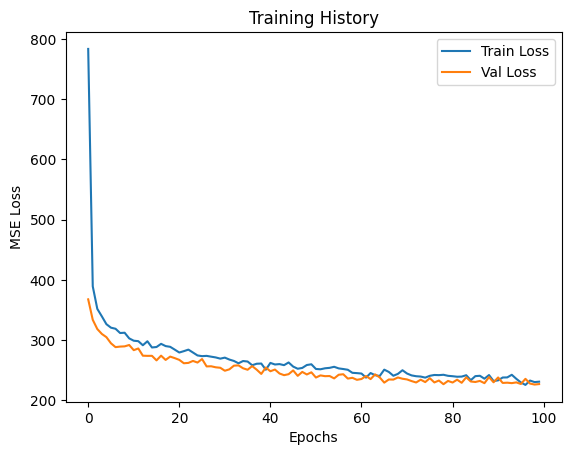

In [749]:
# Load best model
model.load_state_dict(torch.load('best_model.pt'))

# Plot training history
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training History')
plt.legend()
plt.show()

In [779]:
# Predictions
model.eval()
with torch.no_grad():
    y_pred_nn = model(X_test_tensor).numpy()

In [781]:
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = root_mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print("Mean Squared Error:", mse_nn)
print("Root Mean Squared Error:", rmse_nn)
print("R² Score:", r2_nn)

Mean Squared Error: 254.41638771614794
Root Mean Squared Error: 15.950435345662134
R² Score: 0.7781737057095964


<b>Using Random Forest to predict critical temperature</b>

In [784]:
# Train with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

randomforest = RandomForestRegressor(n_estimators=100, random_state=42)

randomforest.fit(X_train_selected, y_train)
y_pred_rf = randomforest.predict(X_test_selected)


In [785]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R²:", r2_rf)

MSE: 83.87526002055927
RMSE: 9.158343737846886
R²: 0.9268689478691793


<b>Using XGBoost to predict critical temperature</b>

In [787]:
xgb_r = xg.XGBRegressor(objective = 'reg:squarederror', n_estimators = 100, seed = 43)

In [788]:
xgb_r.fit(X_train_selected, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [789]:
y_pred_xgb = xgb_r.predict(X_test_selected)

In [790]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)

MSE: 94.69451465110242
RMSE: 9.73111065866083
R²: 0.9174356122919313


In [799]:
from sklearn.metrics import mean_squared_error, r2_score

# Custom RMSE function
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Initialize results list
results = []

# 1. Neural Network
results.append({
    'Model': 'Neural Network',
    'MSE': mse_nn,
    'RMSE': rmse_nn,
    'R2 Score': r2_nn
})

# 2. Random Forest
results.append({
    'Model': 'Random Forest',
    'MSE': mse_rf,
    'RMSE': rmse_rf,
    'R2 Score': r2_rf
})

# 3. XGBoost
results.append({
    'Model': 'XGBoost',
    'MSE': mse_xgb,
    'RMSE': rmse_xgb,
    'R2 Score': r2_xgb
})

# 4. Scaled Linear Regression
y_pred_scaled = model_lr.predict(X_test_scaled_lr)

results.append({
    'Model': 'Linear Regression',
    'MSE': mse_lr,
    'RMSE': rmse_lr,
    'R2 Score': r2_lr
})

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print("Evaluation Metrics Summary:")
display(results_df.sort_values("MSE"))

Evaluation Metrics Summary:


,Model,MSE,RMSE,R2 Score
1,Random Forest,83.875260,9.158344,0.926869
2,XGBoost,94.694515,9.731111,0.917436
0,Neural Network,254.416388,15.950435,0.778174
3,Linear Regression,433.093300,20.810894,0.611711
